<a href="https://colab.research.google.com/github/rskrisel/pandas/blob/main/pandas_workshop_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Manipulation in Pandas and Python

## Getting started with Pandas
Pandas is a Python software library
The name is derived from the term "panel data", an econometrics term for data sets that include observations over multiple time periods for the same individuals

You can think of it as a FREE equivalent to Stata or SPSS for data manipulation and analysis. It is also more powerful than Excel
Knowing how to use Pandas is important if you plan on working with data organized in spreadsheets (either quantitative or qualitative)

## Preparing your workspace
Keeping all your files for a particular project in a designated file directory will keep your project organized and will make it easier to read in your files.

* Start by creating a new folder on your Google Drive. You can name it `pandas_workshop`.
* Save a copy of this Colab notebook in your `pandas_workshop` folder.  To do this, navigate to the `File` menu tab above and select `Save copy in Drive`. Select your `pandas_workshop` folder and save.
* Finally, navigate to your `pandas_workshop` folder and open your notebook copy there or open a new Colab notebook.

Let's get started!

## Introducing the dataset

The dataset we are using for this workshop is from the [U.S. Refugee Arrivals Data](https://github.com/BuzzFeedNews/2015-11-refugees-in-the-united-states/blob/master/data/WRAPS-arrivals-by-destination-2005-2015-clean.csv). This dataset contains data about refugee arrivals to the United States between 2005 and 2015 and was originally compiled from the Department of State’s Refugee Processing Center by Jeremy Singer-Vine for his BuzzFeed article [“Where U.S. Refugees Come From — And Go — In Charts.”](https://www.buzzfeednews.com/article/jsvine/where-us-refugees-come-from-and-go-in-charts#.vooNwy74jO)
As with any dataset, responsible data analysis requires more than just technical tools like Pandas. We also need to interrogate the data.

* Who collected this data?
* How and why is this data being collected?
* What assumptions are baked into this data?
* What consequences might this dataset have on our perseption of refugees and their resettlemt?
* What does this data tell us about our world?



When exploring this dataset, we can consider the meaning of the status of refugee, who has a right to claim that status, and which refugees are considered eligible to legally resettle in the U.S.. We could also think about who may not be represented in this data, including asylum seekers who migrate to the U.S. and become undocumented immigrants while waiting for their asylum claims to be processed.

### Import the Pandas Library

In [1]:
import pandas as pd


### Read in a CSV file as a DataFrame


We will connect to the dataset directly from this [Github link](https://raw.githubusercontent.com/GC-DRI/DRI24/main/uploads/pandas/refugee-arrivals-by-destination.csv)

In [2]:
url = 'https://raw.githubusercontent.com/GC-DRI/DRI24/main/uploads/pandas/refugee-arrivals-by-destination.csv'

In [3]:
refugee_df = pd.read_csv(url)

- With this command, we have created a **Pandas DataFrame** object, which is a 2-dimensional labeled data structure with columns of different types. You can think of it like a spreadsheet or SQL table, or a dictionary of Series objects.
- It is common practice to abbreviate DataFrame with “df”, as in refugee_df.  

---
## Data exploration

### Display the Dataframe

To display the DataFrame, we can run a cell with the variable name of the DataFrame:

In [4]:
refugee_df

,year,origin,dest_state,dest_city,arrivals
0,2005,Afghanistan,Alabama,Mobile,0
1,2006,Afghanistan,Alabama,Mobile,0
2,2007,Afghanistan,Alabama,Mobile,0
3,2008,Afghanistan,Alabama,Mobile,0
4,2009,Afghanistan,Alabama,Mobile,5
...,...,...,...,...,...
121240,2011,Vietnam,Wisconsin,Milwaukee,0
121241,2012,Vietnam,Wisconsin,Milwaukee,4
121242,2013,Vietnam,Wisconsin,Milwaukee,2
121243,2014,Vietnam,Wisconsin,Milwaukee,0


---
### Display a selection of the Dataframe
We can also display the first 2 rows of the DataFrame with the `.head()` method

In [5]:
refugee_df.head(2)

,year,origin,dest_state,dest_city,arrivals
0,2005,Afghanistan,Alabama,Mobile,0
1,2006,Afghanistan,Alabama,Mobile,0


</br>
We can accomplish the same task using a slice instead:

In [6]:
refugee_df[:2]

,year,origin,dest_state,dest_city,arrivals
0,2005,Afghanistan,Alabama,Mobile,0
1,2006,Afghanistan,Alabama,Mobile,0


</br>
We can also display the last 10 rows of the DataFrame with the `.tail()` method

In [7]:
refugee_df.tail(10)

,year,origin,dest_state,dest_city,arrivals
121235,2006,Vietnam,Wisconsin,Milwaukee,5
121236,2007,Vietnam,Wisconsin,Milwaukee,18
121237,2008,Vietnam,Wisconsin,Milwaukee,12
121238,2009,Vietnam,Wisconsin,Milwaukee,4
121239,2010,Vietnam,Wisconsin,Milwaukee,7
121240,2011,Vietnam,Wisconsin,Milwaukee,0
121241,2012,Vietnam,Wisconsin,Milwaukee,4
121242,2013,Vietnam,Wisconsin,Milwaukee,2
121243,2014,Vietnam,Wisconsin,Milwaukee,0
121244,2015,Vietnam,Wisconsin,Milwaukee,0


</br>
We can accomplish the same task using a slice instead:

In [8]:
refugee_df[-10:]

,year,origin,dest_state,dest_city,arrivals
121235,2006,Vietnam,Wisconsin,Milwaukee,5
121236,2007,Vietnam,Wisconsin,Milwaukee,18
121237,2008,Vietnam,Wisconsin,Milwaukee,12
121238,2009,Vietnam,Wisconsin,Milwaukee,4
121239,2010,Vietnam,Wisconsin,Milwaukee,7
121240,2011,Vietnam,Wisconsin,Milwaukee,0
121241,2012,Vietnam,Wisconsin,Milwaukee,4
121242,2013,Vietnam,Wisconsin,Milwaukee,2
121243,2014,Vietnam,Wisconsin,Milwaukee,0
121244,2015,Vietnam,Wisconsin,Milwaukee,0


---
### Display a random sample of the Dataframe

We can also look at a random sample of data with the `.sample()` method

In [9]:
refugee_df.sample(15)

,year,origin,dest_state,dest_city,arrivals
54562,2015,Moldova,Massachusetts,West Springfield,27
47627,2010,Burma,Maryland,Severn,6
4646,2006,Belarus,California,Tarzana,0
2941,2006,Sudan,Arizona,Tempe,0
43741,2007,Vietnam,Kansas,Liberal,0
9329,2014,Iran,California,Moorpark,0
15531,2012,Russia,California,Oakland,0
51365,2008,Afghanistan,Massachusetts,Brighton,0
63300,2008,Moldova,Minnesota,Minnetonka,0
100024,2014,Vietnam,Tennessee,Chattanooga,0


We can tell it's a random sample since the index numbers are completly disorganized.

---
## Basic data cleaning

### Data Types

We can get information about the columns in the DataFrame by using the `.info()` method.

In [10]:
refugee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121245 entries, 0 to 121244
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   year        121245 non-null  int64 
 1   origin      121245 non-null  object
 2   dest_state  121245 non-null  object
 3   dest_city   121245 non-null  object
 4   arrivals    121245 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 4.6+ MB



### Converting data types

In [11]:
refugee_df['year'] = pd.to_datetime(refugee_df['year'], format="%Y")

We can then check to see if the data type was properly converted using the `.dtypes` object, which is similar to the `.info()` method, except it only provides information on data types.

In [12]:
refugee_df.dtypes

year          datetime64[ns]
origin                object
dest_state            object
dest_city             object
arrivals               int64
dtype: object



### Check for duplicate rows

In [13]:
refugee_df[refugee_df.duplicated(keep=False)]

,year,origin,dest_state,dest_city,arrivals
13,2007-01-01,Burma,Alabama,Auburn,0
14,2008-01-01,Burma,Alabama,Auburn,0
15,2009-01-01,Burma,Alabama,Auburn,0
16,2010-01-01,Burma,Alabama,Auburn,0
17,2007-01-01,Burma,Alabama,Auburn,0
18,2008-01-01,Burma,Alabama,Auburn,0
19,2009-01-01,Burma,Alabama,Auburn,0
20,2010-01-01,Burma,Alabama,Auburn,0
155,2013-01-01,Cuba,Alabama,Russellville,0
156,2014-01-01,Cuba,Alabama,Russellville,0


Looks like we have a few duplicate rows in our dataset.

To remove those duplicates, we can use the `.drop_duplicates()` method to drop duplicates from the DataFrame and select to keep the first instance of the duplicate or the last instance:

In [14]:
refugee_df = refugee_df.drop_duplicates(keep='first')

We can check to see if the command got rid of the duplicate rows by running the .duplicated() method again:

In [15]:
refugee_df[refugee_df.duplicated(keep=False)]

,year,origin,dest_state,dest_city,arrivals


Great news! We successfully removed our duplicate rows!

## Rename, select, drop, filter and add new columns
### See list of columns

To see a full list of the columns in our DataFrame, we can run the following command:

In [16]:
refugee_df.columns

Index(['year', 'origin', 'dest_state', 'dest_city', 'arrivals'], dtype='object')

Our DataFrame has relatively few columns, so seeing the full list is not absolutely necessary in our case. This step becomes important when you are working with DataFrames with many columns.

### Rename columns

To improve the readability of our dataset, we can rename columns. In our case, let’s rename “dest_state” as “state” and “dest_city” as “city”. We will use the `.rename()` method and the columns= parameter. Note that in this case we are setting the DataFrame equal to the returned value of the method so as to save the results into the DataFrame.

In [17]:
refugee_df=refugee_df.rename(columns={'dest_state': 'state','dest_city':'city' })
refugee_df

,year,origin,state,city,arrivals
0,2005-01-01,Afghanistan,Alabama,Mobile,0
1,2006-01-01,Afghanistan,Alabama,Mobile,0
2,2007-01-01,Afghanistan,Alabama,Mobile,0
3,2008-01-01,Afghanistan,Alabama,Mobile,0
4,2009-01-01,Afghanistan,Alabama,Mobile,5
...,...,...,...,...,...
121240,2011-01-01,Vietnam,Wisconsin,Milwaukee,0
121241,2012-01-01,Vietnam,Wisconsin,Milwaukee,4
121242,2013-01-01,Vietnam,Wisconsin,Milwaukee,2
121243,2014-01-01,Vietnam,Wisconsin,Milwaukee,0


### Select columns

Let’s say we wanted to view data from just one column in the DataFrame. To do this, we could run the following command:

In [18]:
refugee_df[['state']]

,state
0,Alabama
1,Alabama
2,Alabama
3,Alabama
4,Alabama
...,...
121240,Wisconsin
121241,Wisconsin
121242,Wisconsin
121243,Wisconsin


Here we use double brackets around the column name to transform the column from a Series object into a DataFrame. Basically, the interior brackets are for lists, and the outside brackets are indexing operators. If you are curious to see the difference, try the following command instead: refugee_df['state'].

To view additional columns at the same time, you can add them to the list within the square brackets, separated by a comma. However, you can’t select multiple columns as a Series (try: refugee_df['state','city'])

In [19]:
refugee_df[['state','city']]

,state,city
0,Alabama,Mobile
1,Alabama,Mobile
2,Alabama,Mobile
3,Alabama,Mobile
4,Alabama,Mobile
...,...,...
121240,Wisconsin,Milwaukee
121241,Wisconsin,Milwaukee
121242,Wisconsin,Milwaukee
121243,Wisconsin,Milwaukee


### Drop columns

To remove a column from the DataFrame, we can use the `.drop()` method and include the column name. In our case, we could drop the “city” column and save the result as a new DataFrame “refugee_drop_df” so we don’t override our original DataFrame.

In [20]:
refugee_drop_city_df = refugee_df.drop(columns="city")

In [21]:
refugee_drop_city_df

,year,origin,state,arrivals
0,2005-01-01,Afghanistan,Alabama,0
1,2006-01-01,Afghanistan,Alabama,0
2,2007-01-01,Afghanistan,Alabama,0
3,2008-01-01,Afghanistan,Alabama,0
4,2009-01-01,Afghanistan,Alabama,5
...,...,...,...,...
121240,2011-01-01,Vietnam,Wisconsin,0
121241,2012-01-01,Vietnam,Wisconsin,4
121242,2013-01-01,Vietnam,Wisconsin,2
121243,2014-01-01,Vietnam,Wisconsin,0


### Filter columns

We can filter a Pandas DataFrame to select only certain values. Filtering data by certain values is similar to selecting columns.

We type the name of the DataFrame followed by square brackets and then, instead of inserting a column name, we insert a True/False condition. For example, to select only rows that contain the value “Iraq”, we could run the following command:

In [22]:
refugee_iraq_df = refugee_df[refugee_df['origin'] == 'Iraq']

In [23]:
refugee_iraq_df

,year,origin,state,city,arrivals
267,2005-01-01,Iraq,Alabama,Birmingham,0
268,2006-01-01,Iraq,Alabama,Birmingham,0
269,2007-01-01,Iraq,Alabama,Birmingham,0
270,2008-01-01,Iraq,Alabama,Birmingham,6
271,2009-01-01,Iraq,Alabama,Birmingham,0
...,...,...,...,...,...
120503,2011-01-01,Iraq,Wisconsin,Wauwatosa,0
120504,2012-01-01,Iraq,Wisconsin,Wauwatosa,0
120505,2013-01-01,Iraq,Wisconsin,Wauwatosa,2
120506,2014-01-01,Iraq,Wisconsin,Wauwatosa,0


We stored our results in a new variable `refugee_iraq_df`

### Drop Rows
If we wanted to exclude all rows containing the value “Iraq”, we could run the following command:

In [24]:
refugee_drop_iraq_df = refugee_df[refugee_df['origin'] != 'Iraq']

In [25]:
refugee_drop_iraq_df

,year,origin,state,city,arrivals
0,2005-01-01,Afghanistan,Alabama,Mobile,0
1,2006-01-01,Afghanistan,Alabama,Mobile,0
2,2007-01-01,Afghanistan,Alabama,Mobile,0
3,2008-01-01,Afghanistan,Alabama,Mobile,0
4,2009-01-01,Afghanistan,Alabama,Mobile,5
...,...,...,...,...,...
121240,2011-01-01,Vietnam,Wisconsin,Milwaukee,0
121241,2012-01-01,Vietnam,Wisconsin,Milwaukee,4
121242,2013-01-01,Vietnam,Wisconsin,Milwaukee,2
121243,2014-01-01,Vietnam,Wisconsin,Milwaukee,0


### Add columns

We can also add columns to the DataFrame. For example, we can add a `percent_total` column to calculate the percentage of total refugee arrivals for each row.   

In [26]:
refugee_df['percent_total'] = (refugee_df['arrivals'] / refugee_df['arrivals'].sum())*100

In [27]:
refugee_df

,year,origin,state,city,arrivals,percent_total
0,2005-01-01,Afghanistan,Alabama,Mobile,0,0.000000
1,2006-01-01,Afghanistan,Alabama,Mobile,0,0.000000
2,2007-01-01,Afghanistan,Alabama,Mobile,0,0.000000
3,2008-01-01,Afghanistan,Alabama,Mobile,0,0.000000
4,2009-01-01,Afghanistan,Alabama,Mobile,5,0.000743
...,...,...,...,...,...,...
121240,2011-01-01,Vietnam,Wisconsin,Milwaukee,0,0.000000
121241,2012-01-01,Vietnam,Wisconsin,Milwaukee,4,0.000595
121242,2013-01-01,Vietnam,Wisconsin,Milwaukee,2,0.000297
121243,2014-01-01,Vietnam,Wisconsin,Milwaukee,0,0.000000


*_Note: `refugee_df['arrivals'].sum()` calculates the sum of all the values in the arrivals column._



You can read the command we just ran as: create a new column that calculates the number of arrivals in a row divided by the total number of arrivals in the dataset, times 100. The result of this calculation will equal the percentage of total refugee arrivals for each row.

## Sort Columns, Groupby Columns, & Calculations

### Stacking requests

In this lesson, we will be using commands that stack various requests such as methods, parameters, operators, and more to define the command. Pandas encourages this kind of stacking, but it can seem overwhelming at first to beginners. For example, as we will see below, a command could include two or more methods that stack on top of each other, and end with a slice operator to view only the top N rows of the results. In addition, a command can include specific parameters to call out a particular column or to sort the data in descending order.

We will move slowly through each of the following commands to break them down.

### Sort columns

To sort a DataFrame, we can use the `.sort_values()` method with the parameter by= and including the name of the column we want to sort by written in quotation marks.

For example, we can sort the DataFrame by the arrivals column:

In [28]:
refugee_df.sort_values(by='arrivals', ascending=False)[:15]

,year,origin,state,city,arrivals,percent_total
11359,2009-01-01,Iraq,California,El Cajon,2813,0.418279
8718,2008-01-01,Iran,California,Glendale,2025,0.301107
11360,2010-01-01,Iraq,California,El Cajon,1811,0.269286
8719,2009-01-01,Iran,California,Glendale,1722,0.256053
58761,2012-01-01,Iraq,Michigan,Southfield,1720,0.255755
11362,2012-01-01,Iraq,California,El Cajon,1698,0.252484
8717,2007-01-01,Iran,California,Glendale,1637,0.243414
64090,2006-01-01,Somalia,Minnesota,Minneapolis,1586,0.235830
11358,2008-01-01,Iraq,California,El Cajon,1569,0.233302
25699,2005-01-01,Cuba,Florida,Miami,1537,0.228544


Note: In the command above, we used the `by=` parameter to specify that the data be sorted according to the `arrivals` column and we added the `ascending=False` parameter in order to request that the data be displayed with the highest number first. By default, Pandas will sort in `ascending` order, meaning from the smallest value to the largest value. We also added a Python list slice (i.e., [:15]) to view just the top 15 rows.

### Groupby Columns

We can group data and perform calculations on the groups using the `.groupby()` method. For example, to see the breakdown of the number of arrivals by country of origin, we can use the following command:

In [29]:
refugee_df.groupby('origin')

This command created a Groupby object—grouped data that we can use to perform calculations such as counting the number of non-blank values in each column for each arrival by country of origin.

Next, we will use the following command to sum the number of refugee arrivals by country of origin, with the output showing the top twenty rows sorted by descending order:

In [30]:
refugee_df.groupby('origin')['arrivals'].sum().sort_values(ascending=False)[:20]

origin
Burma              151875
Iraq               127326
Bhutan              85316
Somalia             71120
Cuba                39946
Iran                36683
Dem. Rep. Congo     25493
Russia              15656
Eritrea             14645
Sudan               12636
Ukraine             11727
Burundi             11152
Vietnam             10769
Liberia              9424
Ethiopia             8487
Afghanistan          6751
Laos                 6609
Moldova              4482
Syria                2359
Colombia             1956
Name: arrivals, dtype: int64

These results show us the total number of arrivals by country of origin across the 2005-2015 period, in descending order, sliced for the top 20 results.

Let’s unpack the command to better understand these results:



* We have three stacked methods here: .groupby(), .count(), and .sort_values().
* groupby('origin')['arrivals']: For the Groupby object we defined in the previous step, groupby(‘origin’), we are isolating the “arrivals” column. Basically, we are asking to view the number of refugee arrivals by country of origin.
* .sum(): This method adds non-blank cells for each column or row. The results we see in the output show the total number of refugee arrivals by country of origin.
* .sort_values(ascending=False): This method specifies how we want our output to be sorted. We include the ascending=False parameter in order to request that the data be displayed with the highest percentage first.
* [:20]: This Python slide specifies that we just want to see the top 20 rows.

### Convert Series Object to Dataframe
You will notice that our output is not a Dataframe. Instead, it's a Series Object, which doesn't allow us to select data or make further calculations on the data. We can convert it to a Dataframe by first storing the command above in a new variable and stacking two extra commands" `to_frame` and `reset_index`:

In [31]:
ref_sum_df=refugee_df.groupby('origin')['arrivals'].sum().sort_values(ascending=False)[:20]
ref_sum_df = ref_sum_df.to_frame().reset_index()
ref_sum_df

,origin,arrivals
0,Burma,151875
1,Iraq,127326
2,Bhutan,85316
3,Somalia,71120
4,Cuba,39946
5,Iran,36683
6,Dem. Rep. Congo,25493
7,Russia,15656
8,Eritrea,14645
9,Sudan,12636


## Basic data visualizations

To create plots and data visualization in Pandas, we can add the .plot() method to any DataFrame or Series object that has appropriate numeric data.

We can specify the title with the title= parameter and the kind of plot by altering the kind= parameter:



* ‘bar’ or ‘barh’ for bar plots (h is for horizontal)
* ‘hist’ for histogram
* ‘box’ for boxplot
* ‘kde’ or ‘density’ for density plots
* ‘area’ for area plots
* ‘scatter’ for scatter plots
* ‘hexbin’ for hexagonal bin plots
* ‘pie’ for pie plots

### Bar Charts
For example, we can visualize the data we got from our Groupby command looking at the total number of refugees by country of arrival as a bar chart:

<Axes: title={'center': 'Total number of refugee arrivals in the U.S. \n by country of origin'}, xlabel='origin'>

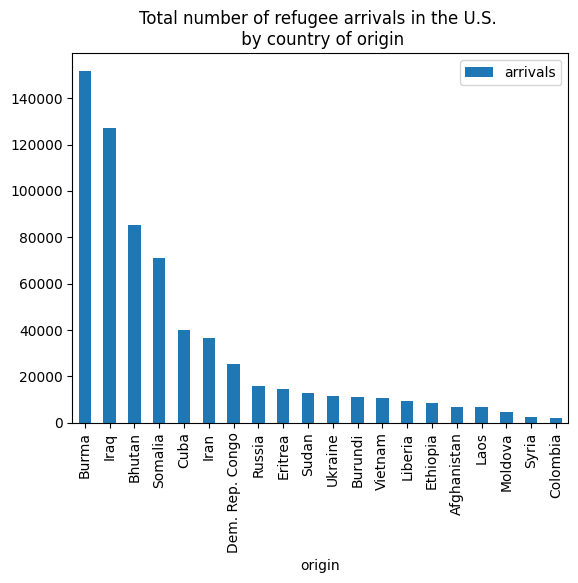

In [32]:
ref_sum_df.plot(kind='bar', x= 'origin', y='arrivals',
                title='Total number of refugee arrivals in the U.S. \n by country of origin')

Let’s unpack the command to better understand these results:

* ref_sum_df: This is the variable we created in the previous lesson summing the number of refugee arrivals by country of origin, with the output showing the top twenty rows sorted by descending order
* .plot(kind='bar', x= 'origin', y='arrivals', title='Total number of refugee arrivals in the U.S. \n by country of origin'):
    * Here we are using the .plot() method to create a visualization, and we are specifying that we want a bar chart with the “kind=’bar’” parameter.
    * We also specify the values for the x axis (orgin) and y axis (arrivals)
    * We are also giving the chart a title with the “title='Total number of refugee arrivals in the U.S. \n by country of origin'” parameter.
        * Note: By adding “\n” in the title text, we signify that the text that follows should be on a new line.

### Pie Charts
We can also visualize the data as a pie chart:

<Axes: title={'center': 'Refugee arrivals in the U.S.'}, ylabel='arrivals'>

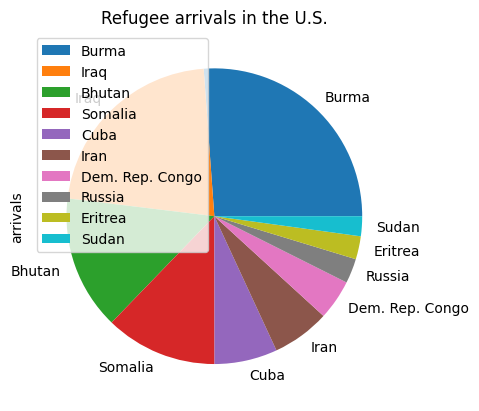

In [33]:
ref_sum_df.set_index('origin')[:10].plot(kind='pie', y='arrivals',
                                         title='Refugee arrivals in the U.S.')

- We start by setting the index of the dataframe to the `origin` column. This ensures that our legend will show the country names.
- We slice our results to show just the top 10 countries. This makes our chart more legible.
- Next, we use the `.plot()` method, specifying `pie` as the type of plot
- We also specify the y values - in our case `arrivals`




### Time Series

We can also create time series using the Groupby method. For example, if we wanted to visualize the total number of refugees resettled in the U.S. across the 2005-2015 period, we would first create a Groupby object based on the “year” column (refer back to lesson 7 for more on Groupby objects).



In [34]:
refugee_df.groupby('year')

Next, we can create a new variable calculating the average number of refugees being resettled over time.

In [35]:
total_arrivals_by_year = refugee_df.groupby('year')['arrivals'].sum()

Let’s break this command down:



* We have two stacked methods here: .groupby() and .sum()
* groupby('year')['arrivals']: For the Groupby object, groupby(year), we are isolating the “arrivals” column. Basically, we are asking to view the number of refugee arrivals by year.
* .sum(): This method returns the sum of the values over the requested axis. In our case, it will calculate the total number of refugee arrivals per year.
* We store our results in the `total_arrivals_by_year` variable

Finally, we can add the .plot() method to create a line chart.

<Axes: title={'center': 'Total Number of Refugee Arrivals by Year'}, xlabel='year'>

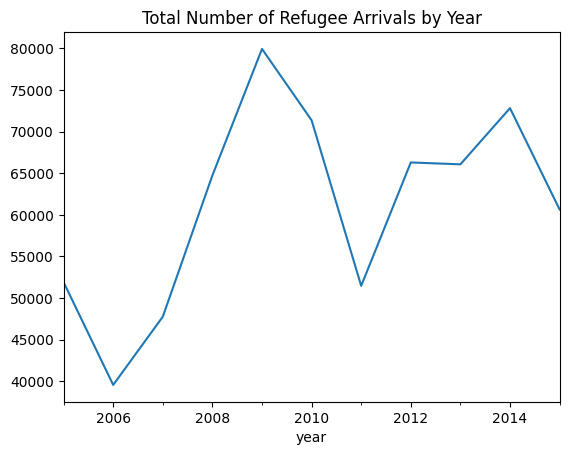

In [36]:
total_arrivals_by_year.plot(kind='line', title="Total Number of Refugee Arrivals by Year")

In this command, we are adding the .plot() method to request a chart, and specifying that we want a line graph with the “kind=line” parameter. We are also giving the chart a title with the “title='Total Number of Refugee Arrivals by Year'” parameter.



## Write to CSV

To output a new CSV file, we can use the .to_csv method with a name for the file in quotation marks. For example, since we added the percent_total column to the refugee_df DataFrame, we may want to download the updated DataFrame as a CSV file to use it with other programs.  

In [37]:
refugee_df.to_csv("new_refugee.csv", encoding='utf-8', index=False)